In [1]:
from packages.data_classes.data2D import Data2D
from packages.data_classes.mesh import Mesh
from packages.plot_classes.tangram import Tangram

In [2]:
import numpy

In [3]:
SD0203_mesh = Mesh('./Data/Geometry/SD/S20190203@25-6-66_24-6.v001.sno')
FS0308_mesh = Mesh('./Data/Geometry/FS/S20190308@25-10-50_25-6.v001.sno')
XD0130_mesh = Mesh('./Data/Geometry/XD/X20190130@31-12-68_26-6.v001.sno')

be careful! data2D reads in IyIx order but quadmesh has to drawn in IxIy order to take care of the cuts!

In [4]:
# electron temperature
SD_te = Data2D(SD0203_mesh, './Data/SDP6/2D_data/temperature/T_electron/te_2D')

FS_te = Data2D(FS0308_mesh, './Data/FSP6/2D_data/temperature/T_electron/te_2D')

XD_te = Data2D(XD0130_mesh, './Data/XDP6/2D_data/temperature/T_electron/te_2D')

In [5]:
# connection length
SD_conn = Data2D(SD0203_mesh, './Data/SDP6/2D_data/geometry/conn_2D')

FS_conn = Data2D(FS0308_mesh, './Data/FSP6/2D_data/geometry/conn_2D')

XD_conn = Data2D(XD0130_mesh, './Data/XDP6/2D_data/geometry/conn_2D')

some preparation calculation

In [6]:
# take out the outer divertor part

# te
SD_te_outerdiv = numpy.transpose(SD_te.IyIx[:, SD0203_mesh.ixcut[1]:])

FS_te_outerdiv = numpy.transpose(FS_te.IyIx[:, FS0308_mesh.ixcut[1]:])

XD_te_outerdiv = numpy.transpose(XD_te.IyIx[:, XD0130_mesh.ixcut[1]:])

# conn

SD_conn_outerdiv = numpy.transpose(SD_conn.IyIx[:, SD0203_mesh.ixcut[1]:])

FS_conn_outerdiv = numpy.transpose(FS_conn.IyIx[:, FS0308_mesh.ixcut[1]:])

XD_conn_outerdiv = numpy.transpose(XD_conn.IyIx[:, XD0130_mesh.ixcut[1]:])

compare electron temperature

# start attempting plots

## do scatter plots

## prepare figure and its axes

In [7]:
import matplotlib.pyplot as plt

te vs connection length

the data along flux tubes ~ 0.2mm radially out from the separatrix

In [9]:
print(SD0203_mesh.iycut)
print(FS0308_mesh.iycut)
print(XD0130_mesh.iycut)

7
7
7


In [8]:
%%capture

fig_1, ax_1 = plt.subplots()

In [10]:
%%capture

ax_1.scatter(SD_conn_outerdiv[:, 10 : 12], SD_te_outerdiv[:, 10 : 12], c = "w", marker = "s", edgecolors = "r")
ax_1.scatter(FS_conn_outerdiv[:, 10 : 12], FS_te_outerdiv[:, 10 : 12], c = "w", marker = "^", edgecolors = "m")
ax_1.scatter(XD_conn_outerdiv[:, 11 : 13], XD_te_outerdiv[:, 11 : 13], c = "w", marker = ".", edgecolors = "b")

add legend using scatter plot trick

In [13]:
%%capture

ax_1_legend_marker_SD = ax_1.scatter([4], [20], c = "w", marker = "s", edgecolors = "r")
ax_1_legend_marker_FS = ax_1.scatter([4], [15], c = "w", marker = "^", edgecolors = "m")
ax_1_legend_marker_XD = ax_1.scatter([4], [10], c = "w", marker = ".", edgecolors = "b")

add legend text

In [16]:
ax_1_legend_text_SD = ax_1.text(4.16, 19, "SD10")
ax_1_legend_text_FS = ax_1.text(4.16, 14, "SD20")
ax_1_legend_text_XD = ax_1.text(4.16, 9, "XD")

set the axes label

In [18]:
%%capture
ax_1.set_xlabel("connection lenth from strike point (m)")
ax_1.set_ylabel("Te (eV)")

add explanation text

In [19]:
ax_1_explain_text = ax_1.text(0, 45, "R - $R_{sep}$ ~ 0.25mm at OMP")
ax_1_explain_text.set_fontsize(12)

In [21]:
ax_1_explain_text.set_position([0, 45])

In [14]:
ax_1.set_xbound(-0.3, 5)
ax_1.set_ybound(0, 50)

In [23]:
ax_1.set_position([0.1, 0.1, 0.9, 0.9])

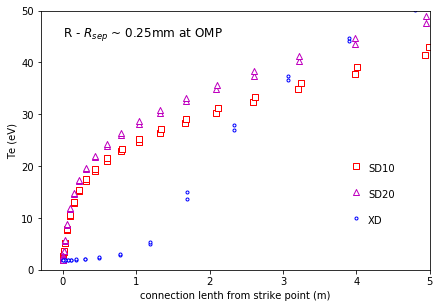

In [24]:
fig_1

In [25]:
fig_1.savefig('TeP6-Scatter.svg', format='svg', bbox_inches='tight')